# 图像特效-图像旋转

In [1]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [25]:
def rotate(src,angle):
    srci = src
    if len(src.shape) < 3:
        srci = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB)
    fcos = np.cos(angle/180.0*np.pi)
    fsin = np.sin(angle/180.0*np.pi)
    
    # 求新图的四个顶点  
    height,width = srci.shape[0],srci.shape[1]
    x1 = int(-(width-1)/2*fcos + (height-1)/2*fsin)
    y1 = int((width-1)/2*fsin + (height-1)/2*fcos)
  
    x2 = int((width-1)/2*fcos + (height-1)/2*fsin)
    y2 = int(-(width-1)/2*fsin + (height-1)/2*fcos) 
  
    x3 = int((width-1)/2*fcos - (height-1)/2*fsin)
    y3 = int(-(width-1)/2*fsin - (height-1)/2*fcos) 
  
    x4 = int(-(width-1)/2*fcos - (height-1)/2*fsin)
    y4 = int( (width-1)/2*fsin - (height-1)/2*fcos)
    
    newWidth = max(abs(x3-x1), abs(x4-x2))
    newHeight = max(abs(y3-y1),abs(y4-y2))
    dst = np.zeros((newHeight,newWidth,srci.shape[2]),dtype=srci.dtype)
    
#     idx = np.arange(0,width-1).reshape((width-1,1)).astype(np.float32)
#     idy = np.arange(0,height-1).reshape((1,height-1)).astype(np.float32)
    
#     nidx = np.arange(0,newWidth-1).reshape((newWidth-1,1)).astype(np.float32)
#     nidy = np.arange(0,newHeight-1).reshape((newHeight-1,1)).astype(np.float32)
    
    f1 = -(newWidth-1)/2*fcos-(newHeight-1)/2*fsin + (width-1)/2 
    f2 = (newWidth-1)/2*fsin - (newHeight-1)/2*fcos + (height-1)/2
    
#     map_idy = (-nidx*fsin + nidy*fcos + f2).astype(np.int32)
#     map_idx = (nidx*fcos + nidy*fsin + f1).astype(np.int32)
    
#     dst[nidy,nidx] = src[map_idy,map_idx]
    
    for i in range(newHeight):
        for j in range(newWidth):
            x0 = int(-j*fsin + i*fcos + f2)
            y0 = int(j*fcos + i*fsin + f1)
            if x0 >=0 and x0 < width and y0>=0 and y0 < height:
                dst[i,j] = srci[y0,x0]
    return dst
    

In [26]:
dst = rotate(src,30)

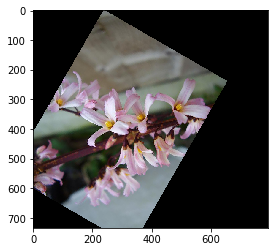

In [27]:
plt.imshow(dst)